In [ ]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-09 17:30:56,128 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:30:56,129 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:30:56,130 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:30:56,134 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 17:30:56,135 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 17:30:56,145 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 17:30:56,386 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-09 17:30:56,419 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:30:56,420 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:30:56,421 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:30:56,426 - settings - Setting enable_python_native_blobs to True


Sleeping 29 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-09 17:30:56,681 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 2825


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,=BLOB=,1400375,2824255,0,0,0,1,8,427,292,10485954.599357573,4727993.083156605,13445.294,87.88,87.88,580.726,553.126,2350,0.0002241093052361655,5.503512880562061,4549944.99,150,0.0005164897609014828,15.667,86456604345.94843,20733767.594250996,8244.991290658958,19001.6812370183,576377362.3063228,6052.7497
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012471798,0,0.25,29.00,=BLOB=,879119,1793791,2,1,2,2,8,287,83,10504921.973170185,3098908.649973214,20600.38,101.514,101.514,460.035,401.749,2708,0.00025778392328056266,9.435540069686411,6126023.074,125,0.00044204861249923526,21.664,133822127394.86624,32030964.53258705,12738.99299172817,21844.8617934256,1070577019.15893,10541.8198
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135012905110,0,0.25,29.00,=BLOB=,816541,1676641,1,1,0,1,9,266,119,10125935.219943585,4352752.241138446,24325.062,90.366,90.366,387.869,355.32,2433,0.00024027410280169214,9.146616541353383,5469864.913,104,0.0004448007471295297,23.394,145698898455.88928,31207278.626825333,14388.6856168038,26636.65387962558,1400950946.6912432,11106.3706
864691135065018692,0,0.25,29.00,=BLOB=,927599,1896021,1,1,1,2,18,276,61,10166672.817443343,2066816.1113789165,17200.227,109.19,109.19,532.523,523.56,2023,0.00019898348617347682,7.329710144927536,5487593.34,122,0.000368649765873504,16.582,124429383137.71652,33444570.407502748,12238.948313968396,22674.67274419364,1019912976.53866,4207.7487
864691135065024068,0,0.25,29.00,=BLOB=,1683573,3378174,2,2,0,1,11,336,99,15436829.265081966,4735182.057076573,30246.518,312.805,283.607,621

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


INFO - 2021-01-09 17:30:56,821 - autopopulate - Found 88 keys to populate
INFO - 2021-01-09 17:30:56,830 - connection - Transaction started
INFO - 2021-01-09 17:30:56,831 - autopopulate - Populating: {'segment_id': 864691136065225112, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00')}


Populate Started


----- Working on 864691136065225112-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0 1 2 3]


 -------- Working on limb 0------------
Starting combinations to process = [[56 76]]


---- working on disconnecting 56 and 76
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [56, 55, 60, 78, 72, 70, 73, 76]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [52 55 58 59 60 70 71 72 73 78 79 80 84]
Short segments to combine = []
Found 0 high degree coordinates to cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [56 55]: curr_angle = 34.37
  Edge: [55 60]: curr_angle = 153.87
  Edge: [60 78]: curr_angle = 32.5
  Edge: [78 72]: curr_angle = 34.69
  Edge: [72 70]: curr_angle = 63.46
  Edge: [70 73]: curr_angle = 105.52
  Edge: [73 76]: curr_angle = 158.75

Total time for doubling_back = 0.9254021644592285
There were 3 edges that passed doubling back threshold of 100
Winning edge [73 76] had a doubling back of 158.74853831124162
***inside resolve crossover!!!!****
coordinate_branches = [73, 76, 79]
73 = red
76 = aqua
79 = purple
Angle between 73 and 76 = 48.47 
Angle between 73 and 79 = 127.36 
Angle between 76 and 79 = 14.34 
Final Matches = [[76, 79]]
matched_branches_revised = [[76, 79]]
Original graph


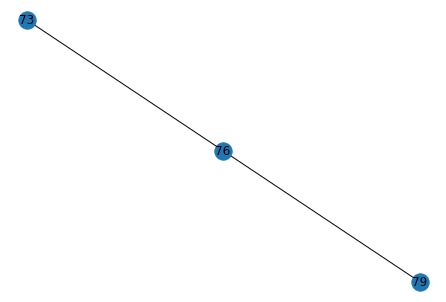

match_branches = [[76, 79]]
edges_to_delete (resolve crossover) = [[73, 76], [73, 79]]
edges_to_create (resolve crossover) = [[76, 79]]
edges_to_delete (cut_limb_network) = [array([73, 76]), array([73, 79])]
edges_to_create = [[76, 79]]
Number of connected components = 2
Comp 0 = {128, 129, 130, 131, 132, 133, 134, 135, 8, 136, 138, 139, 140, 141, 137, 143, 144, 142, 145, 147, 148, 146, 22, 149, 150, 152, 151, 153, 154, 34, 39, 40, 45, 46, 47, 49, 66, 76, 77, 79, 85, 86, 88, 89, 90, 92, 93, 94, 95, 97, 98, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 41, 42, 43, 44, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 80, 81, 82, 83, 84, 87, 91, 96, 99, 100, 101, 102}
curr_limb_copy.deleted_edges = [array([73, 

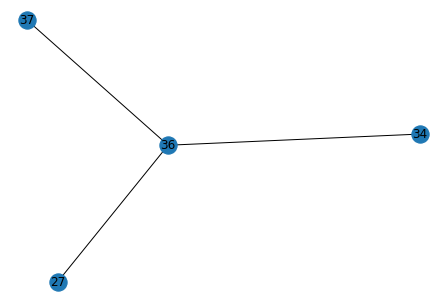

match_branches = [[34, 36], [27, 37]]
edges_to_delete (resolve crossover) = [[27, 34], [27, 36], [34, 37], [36, 37]]
edges_to_create (resolve crossover) = [[34, 36], [27, 37]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 35 because skeletal distance was 1402.6972787247016 and threshold was 2500
Skipping endnode 44 because skeletal distance was 2180.1246712675284 and threshold was 2500
skip_nodes = [35, 44]
edges_to_delete (cut_limb_network) = [[27, 34], [27, 36], [34, 37], [36, 37]]
edges_to_create = [[34, 36], [27, 37]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 41, 42, 45, 46}
Comp 1 = {0, 9, 12, 18, 34, 36, 38, 39, 40, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57}
curr_limb_copy.deleted_edges = [[27, 34], [27, 36], [34, 37], [36, 37]]
curr_limb_copy.created_edges = [[34, 36], [27, 37]]
After get best cut: cut_edges = [[27, 34], [27, 36], [34, 37], [36, 37

  Edge: [1 3]: curr_angle = 41.58
  Edge: [3 2]: curr_angle = 124.7

Total time for doubling_back = 0.07488131523132324
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 2] had a doubling back of 124.703597921918
***inside resolve crossover!!!!****
coordinate_branches = [2, 3, 5]
2 = red
3 = aqua
5 = purple
Angle between 2 and 3 = 130.46 
Angle between 2 and 5 = 15.93 
Angle between 3 and 5 = 40.77 
Final Matches = [[2, 5]]
matched_branches_revised = [[2, 5]]
Original graph


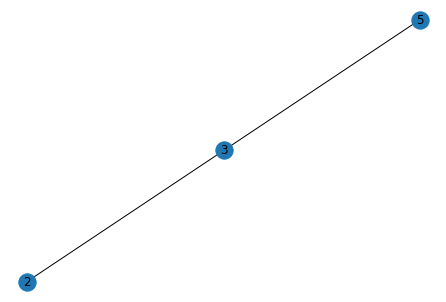

match_branches = [[2, 5]]
edges_to_delete (resolve crossover) = [[2, 3], [3, 5]]
edges_to_create (resolve crossover) = [[2, 5]]
edges_to_delete (cut_limb_network) = [array([2, 3]), array([3, 5])]
edges_to_create = [[2, 5]]
Number of connected components = 2
Comp 0 = {1, 3, 4, 16, 17}
Comp 1 = {0, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
curr_limb_copy.deleted_edges = [array([2, 3]), array([3, 5])]
curr_limb_copy.created_edges = [[2, 5]]
After get best cut: cut_edges = [array([2, 3]), array([3, 5])], added_edges = [[2, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIR

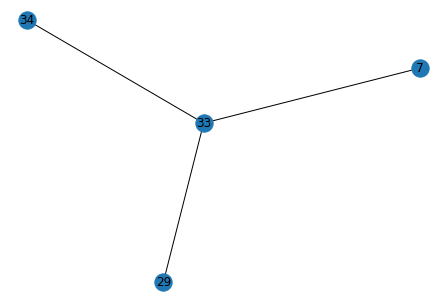

match_branches = [[33, 34]]
edges_to_delete (resolve crossover) = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
edges_to_create (resolve crossover) = [[33, 34]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 30 because skeletal distance was 1837.1935523869608 and threshold was 2500
skip_nodes = [30]
edges_to_delete (cut_limb_network) = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
edges_to_create = [[33, 34]]
Number of connected components = 4
Comp 0 = {28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 1 = {7}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
curr_limb_copy.created_edges = [[33, 34]]
After get best cut: cut_edges = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]], added_edges = [[33, 34]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 

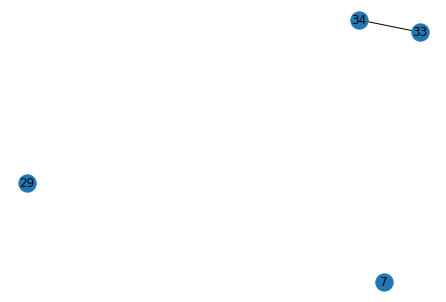

match_branches = [[33, 34]]
edges_to_delete (resolve crossover) = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
edges_to_create (resolve crossover) = [[33, 34]]
curr_limb.deleted_edges 5 =[[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
Skipping endnode 30 because skeletal distance was 1837.1935523869608 and threshold was 2500
skip_nodes = [30]
edges_to_delete (cut_limb_network) = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
edges_to_create = [[33, 34]]
Number of connected components = 4
Comp 0 = {28, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 1 = {7}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34], [7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
curr_limb_copy.created_edges = [[33, 34], [33, 34]]
After get best cut: cut_edges = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]], ad

  Edge: [31 37]: curr_angle = 64.18
  Edge: [37 34]: curr_angle = 135.52
  Edge: [34 33]: curr_angle = 43.96

Total time for doubling_back = 0.11756038665771484
There were 1 edges that passed doubling back threshold of 100
Winning edge [37 34] had a doubling back of 135.51822194915258
***inside resolve crossover!!!!****
coordinate_branches = [34, 36, 37]
34 = red
36 = aqua
37 = purple
Angle between 34 and 36 = 8.91 
Angle between 34 and 37 = 146.84 
Angle between 36 and 37 = 35.5 
Final Matches = [[34, 36]]
matched_branches_revised = [[34, 36]]
Original graph


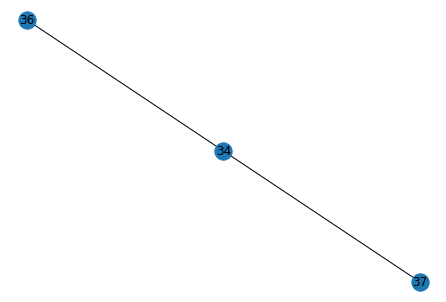

match_branches = [[34, 36]]
edges_to_delete (resolve crossover) = [[34, 37], [36, 37]]
edges_to_create (resolve crossover) = [[34, 36]]
edges_to_delete (cut_limb_network) = [array([34, 37]), array([36, 37])]
edges_to_create = [[34, 36]]
Number of connected components = 5
Comp 0 = {37, 39, 40, 41, 28, 30, 31}
Comp 1 = {33, 34, 35, 36, 38, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}
Comp 2 = {7}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}
Comp 4 = {32}
curr_limb_copy.deleted_edges = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34], [7, 29], [7, 33], [7, 34], [29, 33], [29, 34], array([34, 37]), array([36, 37])]
curr_limb_copy.created_edges = [[33, 34], [33, 34], [34, 36]]
After get best cut: cut_edges = [array([34, 37]), array([36, 37])], added_edges = [[34, 36]]
total_soma_paths_to_cut = [[7, 29], [7, 33], [7, 34], [29, 33], [29, 34]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the end o

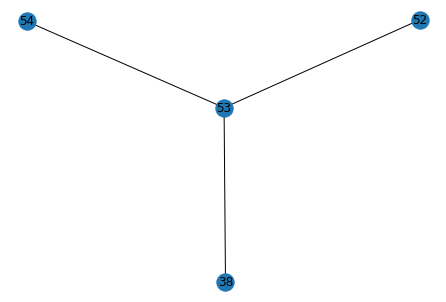

match_branches = [[38, 54], [52, 53]]
edges_to_delete (resolve crossover) = [[38, 52], [38, 53], [52, 54], [53, 54]]
edges_to_create (resolve crossover) = [[38, 54], [52, 53]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 103 because skeletal distance was 113.37844615605906 and threshold was 2500
skip_nodes = [103]
edges_to_delete (cut_limb_network) = [[38, 52], [38, 53], [52, 54], [53, 54]]
edges_to_create = [[38, 54], [52, 53]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 54, 57, 58, 59, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 1

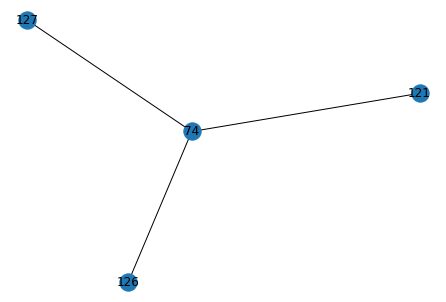

match_branches = [[74, 127], [121, 126]]
edges_to_delete (resolve crossover) = [[74, 121], [74, 126], [121, 127], [126, 127]]
edges_to_create (resolve crossover) = [[74, 127], [121, 126]]
curr_limb.deleted_edges 5 =[[38, 52], [38, 53], [52, 54], [53, 54]]
Skipping endnode 103 because skeletal distance was 113.37844615605906 and threshold was 2500
skip_nodes = [103]
edges_to_delete (cut_limb_network) = [[74, 121], [74, 126], [121, 127], [126, 127]]
edges_to_create = [[74, 127], [121, 126]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 54, 57, 58, 59, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 12

  Edge: [102  99]: curr_angle = 15.97
  Edge: [99 92]: curr_angle = 13.77
  Edge: [92 85]: curr_angle = 15.56
  Edge: [85 79]: curr_angle = 16.66
  Edge: [79 75]: curr_angle = 9.07
  Edge: [75 68]: curr_angle = 17.89
  Edge: [68 64]: curr_angle = 25.34
  Edge: [64 49]: curr_angle = 3.6
  Edge: [49 46]: curr_angle = 9.2
  Edge: [46 43]: curr_angle = 19.52
  Edge: [43 37]: curr_angle = 11.6
  Edge: [37 34]: curr_angle = 20.14
  Edge: [34 32]: curr_angle = 9.75
  Edge: [32 27]: curr_angle = 13.47
  Edge: [27 23]: curr_angle = 29.29
  Edge: [23 24]: curr_angle = 39.42
  Edge: [24 31]: curr_angle = 13.8
  Edge: [31 26]: curr_angle = 17.87
  Edge: [26 22]: curr_angle = 20.95
  Edge: [22 74]: curr_angle = 19.68
  Edge: [ 74 127]: curr_angle = 11.81
  Edge: [127 136]: curr_angle = 28.93
  Edge: [136 146]: curr_angle = 60.28
  Edge: [146 149]: curr_angle = 26.78
  Edge: [149 158]: curr_angle = 34.84
  Edge: [158 155]: curr_angle = 46.61
  Edge: [155 156]: curr_angle = 37.19

Total time for doub

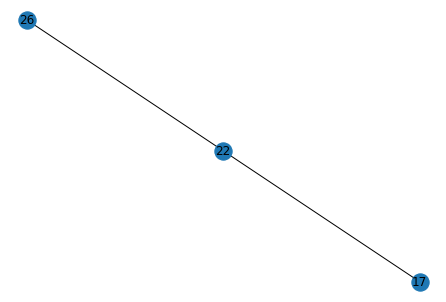

match_branches = [[17, 26]]
edges_to_delete (resolve crossover) = [[17, 22], [22, 26]]
edges_to_create (resolve crossover) = [[17, 26]]
edges_to_delete (cut_limb_network) = [array([17, 22]), array([22, 26])]
edges_to_create = [[17, 26]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 54, 57, 59, 61, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 128, 130}
Comp 1 = {4, 45, 78, 47, 48, 51, 52, 53, 56, 25, 60, 62}
Comp 2 = {129, 131, 132, 133, 134, 135, 136, 137, 154, 139, 140, 138, 142, 143, 144, 145, 146, 147, 148, 149, 22, 150, 152, 153, 151, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 58, 66, 141, 74, 95, 96, 

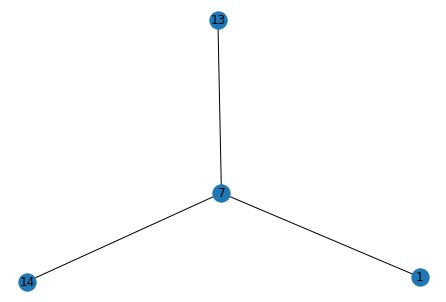

match_branches = [[1, 14]]
edges_to_delete (resolve crossover) = [[1, 7], [1, 13], [7, 13], [7, 14], [13, 14]]
edges_to_create (resolve crossover) = [[1, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 7], [1, 13], [7, 13], [7, 14], [13, 14]]
edges_to_create = [[1, 14]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 16, 20, 22}
Comp 1 = {1, 4, 9, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 26, 27}
curr_limb_copy.deleted_edges = [[1, 7], [1, 13], [7, 13], [7, 14], [13, 14]]
curr_limb_copy.created_edges = [[1, 14]]
After get best cut: cut_edges = [[1, 7], [1, 13], [7, 13], [7, 14], [13, 14]], added_edges = [[1, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of 

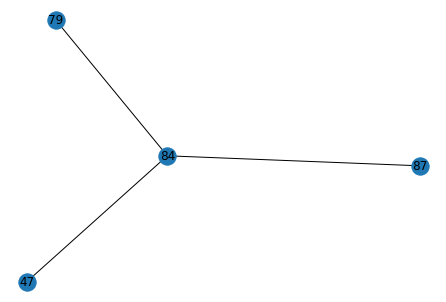

match_branches = [[47, 84], [79, 87]]
edges_to_delete (resolve crossover) = [[47, 79], [47, 87], [79, 84], [84, 87]]
edges_to_create (resolve crossover) = [[47, 84], [79, 87]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[47, 79], [47, 87], [79, 84], [84, 87]]
edges_to_create = [[47, 84], [79, 87]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 65, 66, 70, 71, 72, 73, 75, 77, 78, 82, 83, 84, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123}
Comp 1 = {64, 67, 68, 69, 37, 39, 74, 43, 76, 79, 80, 81, 49, 86, 87, 56, 89, 63}
Comp 2 = {85}
curr_limb_copy.deleted_edges = [[47, 79], [47, 87], [79, 84], [84, 87]]
curr_limb_copy

  Edge: [21 22]: curr_angle = 55.41
  Edge: [22 23]: curr_angle = 18.66
  Edge: [23 29]: curr_angle = 17.6
  Edge: [29 31]: curr_angle = 20.42
  Edge: [31 35]: curr_angle = 8.59
  Edge: [35 41]: curr_angle = 43.31
  Edge: [41 55]: curr_angle = 52.07
  Edge: [55 54]: curr_angle = 41.91
  Edge: [54 71]: curr_angle = 32.91
  Edge: [71 72]: curr_angle = 30.73
  Edge: [72 73]: curr_angle = 12.59
  Edge: [73 78]: curr_angle = 41.83
  Edge: [78 77]: curr_angle = 27.39

Total time for doubling_back = 0.8679337501525879

Attempting the width jump check (attempting from both sides)
  Edge: [21 22]: jump = -314.07
  Edge: [22 23]: jump = -84.56
  Edge: [23 29]: jump = -17.1
  Edge: [29 31]: jump = 53.2
  Edge: [31 35]: jump = -78.32
  Edge: [35 41]: jump = -189.29
  Edge: [41 55]: jump = 66.05
  Edge: [55 54]: jump = 423.19
Adding error edge [55 54] because width jump was 423.1910088756956
  Edge: [54 71]: jump = 350.13
Adding error edge [54 71] because width jump was 350.12960168440236
  Edge: [

  Edge: [63 62]: curr_angle = 38.2
  Edge: [62 61]: curr_angle = 142.49
  Edge: [61 65]: curr_angle = 43.5

Total time for doubling_back = 0.10263657569885254
There were 1 edges that passed doubling back threshold of 100
Winning edge [62 61] had a doubling back of 142.4862577652178
***inside resolve crossover!!!!****
coordinate_branches = [44, 61, 62]
44 = red
61 = aqua
62 = purple
Angle between 44 and 61 = 34.81 
Angle between 44 and 62 = 7.45 
Angle between 61 and 62 = 139.33 
Final Matches = [[44, 61], [44, 62]]
matched_branches_revised = [[44, 62]]
Original graph


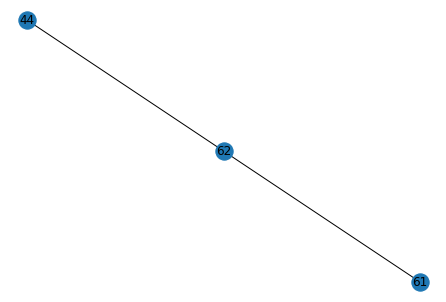

match_branches = [[44, 62]]
edges_to_delete (resolve crossover) = [[44, 61], [61, 62]]
edges_to_create (resolve crossover) = [[44, 62]]
edges_to_delete (cut_limb_network) = [array([44, 61]), array([61, 62])]
edges_to_create = [[44, 62]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 63}
Comp 1 = {64, 65, 58, 59, 61}
curr_limb_copy.deleted_edges = [array([44, 61]), array([61, 62])]
curr_limb_copy.created_edges = [[44, 62]]
After get best cut: cut_edges = [array([44, 61]), array([61, 62])], added_edges = [[44, 62]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the 

  Edge: [3 4]: curr_angle = 130.43

Total time for doubling_back = 0.09807944297790527
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 4] had a doubling back of 130.42976346303914
***inside resolve crossover!!!!****
coordinate_branches = [3, 4, 5]
3 = red
4 = aqua
5 = purple
Angle between 3 and 4 = 131.89 
Angle between 3 and 5 = 35.62 
Angle between 4 and 5 = 55.52 
Final Matches = []
matched_branches_revised = []
Original graph


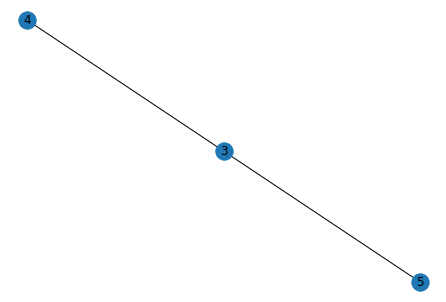

match_branches = []
edges_to_delete (resolve crossover) = [[3, 4], [3, 5], [4, 5]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([3, 4]), array([3, 5]), array([4, 5])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {3}
Comp 1 = {4}
Comp 2 = {0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12}
curr_limb_copy.deleted_edges = [array([3, 4]), array([3, 5]), array([4, 5])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([3, 4]), array([3, 5]), array([4, 5])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([3]), array([4]), array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12])]


 -------- Working on limb 8------------
Starting combinat

  Edge: [8 7]: curr_angle = 18.62
  Edge: [7 4]: curr_angle = 49.29
  Edge: [4 5]: curr_angle = 161.27
  Edge: [5 9]: curr_angle = 50.75

Total time for doubling_back = 0.20957231521606445
There were 1 edges that passed doubling back threshold of 100
Winning edge [4 5] had a doubling back of 161.2674461297393
***inside resolve crossover!!!!****
coordinate_branches = [2, 4, 5]
2 = red
4 = aqua
5 = purple
Angle between 2 and 4 = 40.13 
Angle between 2 and 5 = 26.68 
Angle between 4 and 5 = 134.96 
Final Matches = [[2, 5]]
matched_branches_revised = [[2, 5]]
Original graph


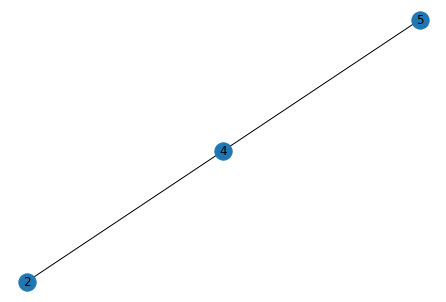

match_branches = [[2, 5]]
edges_to_delete (resolve crossover) = [[2, 4], [4, 5]]
edges_to_create (resolve crossover) = [[2, 5]]
edges_to_delete (cut_limb_network) = [array([2, 4]), array([4, 5])]
edges_to_create = [[2, 5]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 5, 9, 10}
Comp 1 = {3, 4, 6, 7, 8}
curr_limb_copy.deleted_edges = [array([2, 4]), array([4, 5])]
curr_limb_copy.created_edges = [[2, 5]]
After get best cut: cut_edges = [array([2, 4]), array([4, 5])], added_edges = [[2, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  5,  9, 10]), array([3, 4, 6, 7, 8])]


 ------ Total time for Splitting 864691136618586765 = 198.6466829776764 ------


----- Working on 864691135725648447--

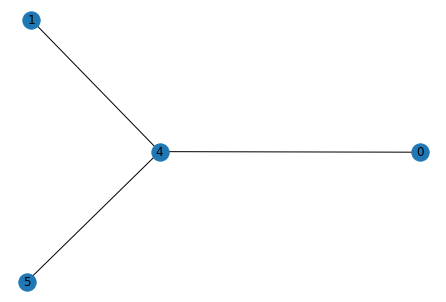

match_branches = [[0, 5]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create (resolve crossover) = [[0, 5]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create = [[0, 5]]
Number of connected components = 4
Comp 0 = {0, 2, 5, 6, 7, 8, 11, 12, 13}
Comp 1 = {1}
Comp 2 = {9, 10, 4}
Comp 3 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
curr_limb_copy.created_edges = [[0, 5]]
After get best cut: cut_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]], added_edges = [[0, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([ 0,  2,  5,  6,  7,  8, 11, 12, 13]), 

  Edge: [3 4]: curr_angle = 41.24
  Edge: [4 5]: curr_angle = 13.76
  Edge: [ 5 12]: curr_angle = 159.21
  Edge: [12  8]: curr_angle = 32.05

Total time for doubling_back = 0.38674259185791016
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 5 12] had a doubling back of 159.2099399767105
***inside resolve crossover!!!!****
coordinate_branches = [5, 12, 13]
5 = red
12 = aqua
13 = purple
Angle between 5 and 12 = 155.75 
Angle between 5 and 13 = 10.04 
Angle between 12 and 13 = 24.51 
Final Matches = [[5, 13], [12, 13]]
matched_branches_revised = [[5, 13]]
Original graph


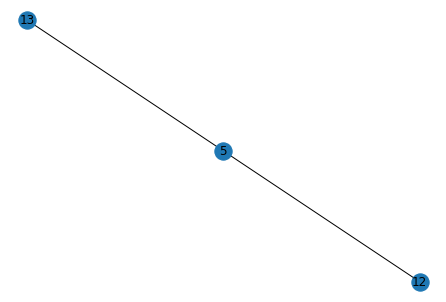

match_branches = [[5, 13]]
edges_to_delete (resolve crossover) = [[5, 12], [12, 13]]
edges_to_create (resolve crossover) = [[5, 13]]
edges_to_delete (cut_limb_network) = [array([ 5, 12]), array([12, 13])]
edges_to_create = [[5, 13]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 10, 13, 14}
Comp 1 = {7, 8, 9, 11, 12}
curr_limb_copy.deleted_edges = [array([ 5, 12]), array([12, 13])]
curr_limb_copy.created_edges = [[5, 13]]
After get best cut: cut_edges = [array([ 5, 12]), array([12, 13])], added_edges = [[5, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6, 10, 13, 14]), array([ 7,  8,  9, 11, 12])]


 ------ Total time for Splitting 864691135725648447 = 83.1311

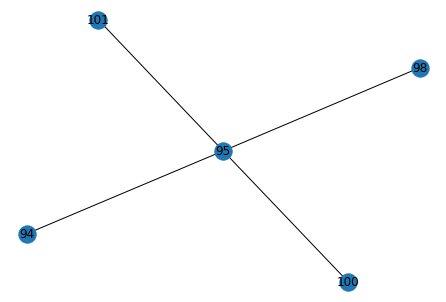

match_branches = [[94, 100]]
edges_to_delete (resolve crossover) = [[94, 95], [94, 98], [94, 101], [95, 98], [95, 100], [95, 101], [98, 100], [98, 101], [100, 101]]
edges_to_create (resolve crossover) = [[94, 100]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[94, 95], [94, 98], [94, 101], [95, 98], [95, 100], [95, 101], [98, 100], [98, 101], [100, 101]]
edges_to_create = [[94, 100]]
Number of connected components = 4
Comp 0 = {100, 94}
Comp 1 = {90, 91, 75, 76, 77, 78, 79, 63, 61, 85, 87, 88, 89, 58, 59, 92, 93, 95}
Comp 2 = {98}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 86, 96, 97, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117}
curr_limb_copy.dele

  Edge: [0 2]: curr_angle = 44.65

Total time for doubling_back = 0.2514071464538574

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -59.91
Total time for width = 0.22083353996276855
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 59.91
Total time for width = 0.22234201431274414
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135609493511 = 188.15811562538147 ------


----- Working on 864691135974471279-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [2 3]
multi_touch_limbs = [3]


 -------- Working

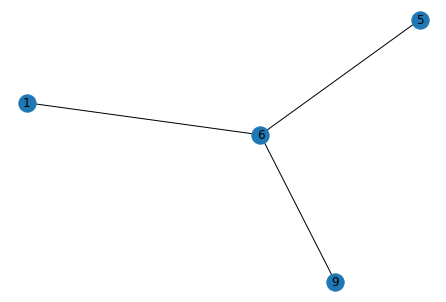

match_branches = [[1, 9]]
edges_to_delete (resolve crossover) = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9]]
edges_to_create (resolve crossover) = [[1, 9]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 39 because skeletal distance was 353.5265312226604 and threshold was 2500
skip_nodes = [39]
edges_to_delete (cut_limb_network) = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9]]
edges_to_create = [[1, 9]]
Number of connected components = 3
Comp 0 = {0, 1, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {5}
Comp 2 = {2, 3, 4, 6, 8}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9]]
curr_limb_copy.created_edges = [[1, 9]]
After get best cut: cut_edges = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9]], added_edges = [[1, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of

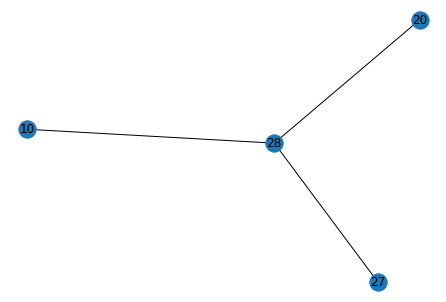

match_branches = [[27, 28]]
edges_to_delete (resolve crossover) = [[10, 20], [10, 27], [10, 28], [20, 27], [20, 28]]
edges_to_create (resolve crossover) = [[27, 28]]
curr_limb.deleted_edges 5 =[[1, 5], [1, 6], [5, 6], [5, 9], [6, 9]]
Skipping endnode 39 because skeletal distance was 353.5265312226604 and threshold was 2500
skip_nodes = [39]
edges_to_delete (cut_limb_network) = [[10, 20], [10, 27], [10, 28], [20, 27], [20, 28]]
edges_to_create = [[27, 28]]
Number of connected components = 5
Comp 0 = {0, 1, 7, 9, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {10}
Comp 2 = {19, 20, 13}
Comp 3 = {5}
Comp 4 = {2, 3, 4, 6, 8}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9], [10, 20], [10, 27], [10, 28], [20, 27], [20, 28]]
curr_limb_copy.created_edges = [[1, 9], [27, 28]]
After get best cut: cut_edges = [[10, 20], [10, 2

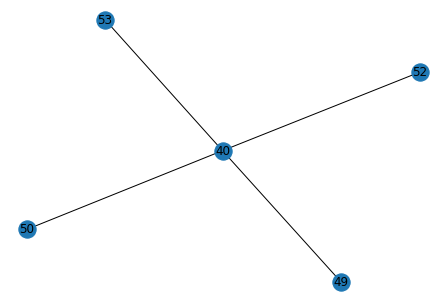

match_branches = [[40, 49]]
edges_to_delete (resolve crossover) = [[40, 50], [40, 52], [40, 53], [49, 50], [49, 52], [49, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create (resolve crossover) = [[40, 49]]
curr_limb.deleted_edges 5 =[[1, 5], [1, 6], [5, 6], [5, 9], [6, 9], [10, 20], [10, 27], [10, 28], [20, 27], [20, 28]]
Skipping endnode 39 because skeletal distance was 353.5265312226604 and threshold was 2500
skip_nodes = [39]
edges_to_delete (cut_limb_network) = [[40, 50], [40, 52], [40, 53], [49, 50], [49, 52], [49, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create = [[40, 49]]
Number of connected components = 8
Comp 0 = {0, 1, 7, 9, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Comp 1 = {10}
Comp 2 = {19, 20, 13}
Comp 3 = {50, 51}
Comp 4 = {52}
Comp 5 = {53, 54, 55, 56, 57, 58, 59, 60}
Comp 6 = {5}
Comp 7 = {2, 3, 4, 6, 8}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [5, 6], [5, 9

  Edge: [28 27]: curr_angle = 24.8
  Edge: [27 29]: curr_angle = 41.56
  Edge: [29 30]: curr_angle = 21.19
  Edge: [30 40]: curr_angle = 64.09
  Edge: [40 49]: curr_angle = 5.22

Total time for doubling_back = 0.42914748191833496

Attempting the width jump check (attempting from both sides)
  Edge: [28 27]: jump = -57.52
  Edge: [27 29]: jump = -167.93
  Edge: [29 30]: jump = -137.98
  Edge: [30 40]: jump = -200.97
  Edge: [40 49]: jump = -209.99
Total time for width = 0.4009215831756592
Path starting at 39 had err_edges: []
  Edge: [49 40]: jump = 209.99
Adding error edge [49 40] because width jump was 209.98693567174394
  Edge: [40 30]: jump = 200.97
Adding error edge [40 30] because width jump was 200.96816058217138
  Edge: [30 29]: jump = 137.98
  Edge: [29 27]: jump = 167.93
  Edge: [27 28]: jump = 57.52
Total time for width = 0.40160632133483887
Path starting at 49 had err_edges: [[49, 40], [40, 30]]
first_error_sizes = [-inf, 209.98693567174394], winning_path = 1
***inside resol

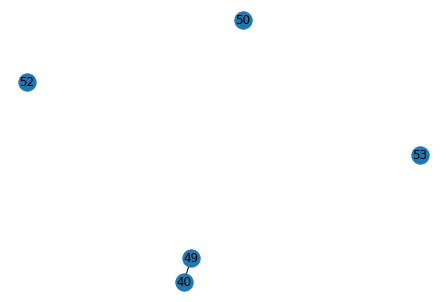

match_branches = [[40, 49]]
edges_to_delete (resolve crossover) = [[40, 50], [40, 52], [40, 53], [49, 50], [49, 52], [49, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create (resolve crossover) = [[40, 49]]
Rejecting creating edge [40, 49] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([40, 49]), array([40, 50]), array([40, 52]), array([40, 53]), array([49, 50]), array([49, 52]), array([49, 53]), array([50, 52]), array([50, 53]), array([52, 53])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {0, 1, 7, 9, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 1 = {10}
Comp 2 = {19, 20, 13}
Comp 3 = {49}
Comp 4 = {50, 51}
Comp 5 = {52}
Comp 6 = {53, 54, 55, 56, 57, 58, 59, 60}
Comp 7 = {5}
Comp 8 = {2, 3, 4, 6, 8}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9], [10, 20], [10, 27], [10, 28], [20, 27], [20, 

  Edge: [28 27]: curr_angle = 24.8
  Edge: [27 29]: curr_angle = 41.56
  Edge: [29 30]: curr_angle = 21.19
  Edge: [30 40]: curr_angle = 64.09
  Edge: [40 49]: curr_angle = 5.22

Total time for doubling_back = 0.42996859550476074

Attempting the width jump check (attempting from both sides)
  Edge: [28 27]: jump = -57.52
  Edge: [27 29]: jump = -167.93
  Edge: [29 30]: jump = -137.98
  Edge: [30 40]: jump = -200.97
  Edge: [40 49]: jump = -209.99
Total time for width = 0.3984668254852295
Path starting at 39 had err_edges: []
  Edge: [49 40]: jump = 209.99
Adding error edge [49 40] because width jump was 209.98693567174394
  Edge: [40 30]: jump = 200.97
Adding error edge [40 30] because width jump was 200.96816058217138
  Edge: [30 29]: jump = 137.98
  Edge: [29 27]: jump = 167.93
  Edge: [27 28]: jump = 57.52
Total time for width = 0.4035050868988037
Path starting at 49 had err_edges: [[49, 40], [40, 30]]
first_error_sizes = [-inf, 209.98693567174394], winning_path = 1
***inside resolv

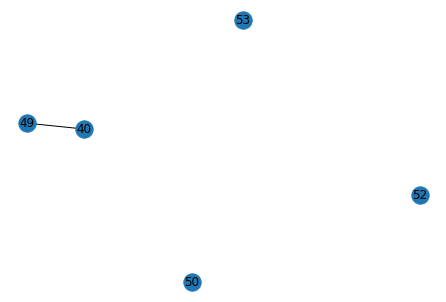

match_branches = [[40, 49]]
edges_to_delete (resolve crossover) = [[40, 50], [40, 52], [40, 53], [49, 50], [49, 52], [49, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create (resolve crossover) = [[40, 49]]
Rejecting creating edge [40, 49] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([40, 49]), array([40, 50]), array([40, 52]), array([40, 53]), array([49, 50]), array([49, 52]), array([49, 53]), array([50, 52]), array([50, 53]), array([52, 53])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {0, 1, 7, 9, 11, 12, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 1 = {10}
Comp 2 = {19, 20, 13}
Comp 3 = {49}
Comp 4 = {50, 51}
Comp 5 = {52}
Comp 6 = {53, 54, 55, 56, 57, 58, 59, 60}
Comp 7 = {5}
Comp 8 = {2, 3, 4, 6, 8}
curr_limb_copy.deleted_edges = [[1, 5], [1, 6], [5, 6], [5, 9], [6, 9], [10, 20], [10, 27], [10, 28], [20, 27], [20, 

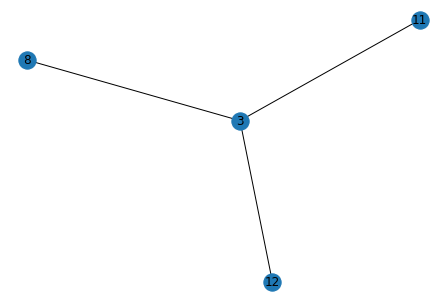

match_branches = [[8, 12]]
edges_to_delete (resolve crossover) = [[3, 8], [3, 11], [3, 12], [8, 11], [11, 12]]
edges_to_create (resolve crossover) = [[8, 12]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 8], [3, 11], [3, 12], [8, 11], [11, 12]]
edges_to_create = [[8, 12]]
Number of connected components = 3
Comp 0 = {6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
Comp 1 = {0, 1, 2, 3, 4, 5, 7}
Comp 2 = {11}
curr_limb_copy.deleted_edges = [[3, 8], [3, 11], [3, 12], [8, 11], [11, 12]]
curr_limb_copy.created_edges = [[8, 12]]
After get best cut: cut_edges = [[3, 8], [3, 11], [3, 12], [8, 11], [11, 12]], added_edges = [[8, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 7 and 22
---- T

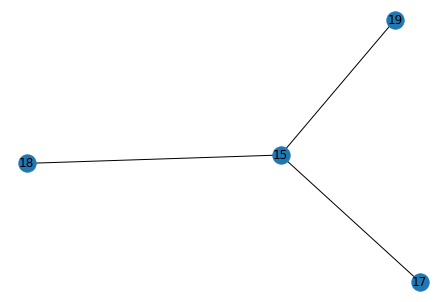

match_branches = [[17, 19], [15, 18]]
edges_to_delete (resolve crossover) = [[15, 17], [15, 19], [17, 18], [18, 19]]
edges_to_create (resolve crossover) = [[17, 19], [15, 18]]
curr_limb.deleted_edges 5 =[[3, 8], [3, 11], [3, 12], [8, 11], [11, 12]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 17], [15, 19], [17, 18], [18, 19]]
edges_to_create = [[17, 19], [15, 18]]
Number of connected components = 4
Comp 0 = {8, 9, 10, 12, 13, 14, 15, 16, 18, 20, 21}
Comp 1 = {0, 1, 2, 3, 4, 5, 7}
Comp 2 = {11}
Comp 3 = {17, 19, 6, 22}
curr_limb_copy.deleted_edges = [[3, 8], [3, 11], [3, 12], [8, 11], [11, 12], [15, 17], [15, 19], [17, 18], [18, 19]]
curr_limb_copy.created_edges = [[8, 12], [17, 19], [15, 18]]
After get best cut: cut_edges = [[15, 17], [15, 19], [17, 18], [18, 19]], added_edges = [[17, 19], [15, 18]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs 

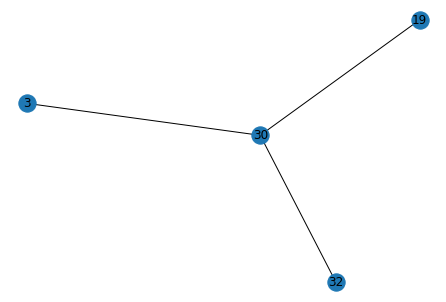

match_branches = [[3, 32], [19, 30]]
edges_to_delete (resolve crossover) = [[3, 19], [3, 30], [19, 32], [30, 32]]
edges_to_create (resolve crossover) = [[3, 32], [19, 30]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 19], [3, 30], [19, 32], [30, 32]]
edges_to_create = [[3, 32], [19, 30]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,

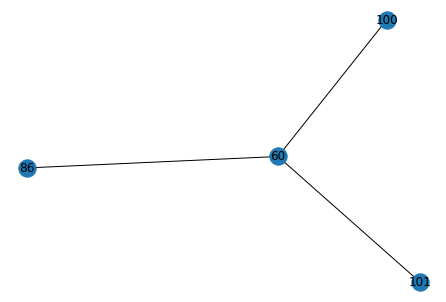

match_branches = [[60, 101]]
edges_to_delete (resolve crossover) = [[60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
edges_to_create (resolve crossover) = [[60, 101]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
edges_to_create = [[60, 101]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 24, 25, 27, 30, 31, 34, 35, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 72, 73, 74, 75, 76, 77, 78, 79, 83, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,

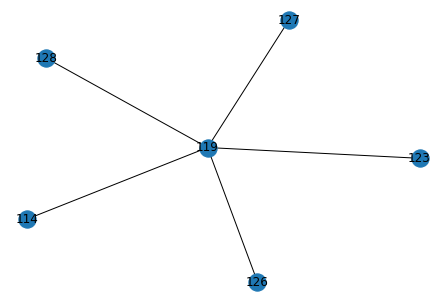

match_branches = [[114, 127]]
edges_to_delete (resolve crossover) = [[114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128]]
edges_to_create (resolve crossover) = [[114, 127]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128]]
edges_to_create = [[114, 127]]
Number of connected components = 9
Comp 0 = {0, 5, 9, 11, 12, 15, 18, 25, 31, 38, 41, 42, 44, 46, 47, 50, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 83, 87, 88, 89, 91, 92, 93, 94, 97, 98, 99, 101, 103, 105, 107, 109, 113, 114, 115, 116, 118, 123, 125, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138

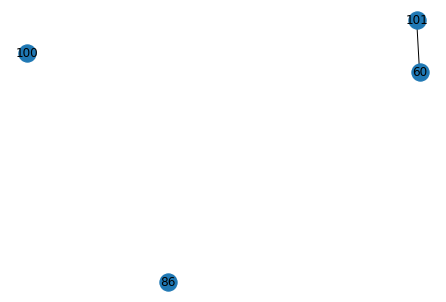

match_branches = [[60, 101]]
edges_to_delete (resolve crossover) = [[60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
edges_to_create (resolve crossover) = [[60, 101]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
edges_to_create = [[60, 101]]
Number of connected components = 10
Comp 0 = {0, 5, 9, 11, 12, 15, 18, 25, 31, 38, 41, 42, 44, 46, 47, 50, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 83, 87, 88, 89, 91, 92, 93, 94, 97, 98, 99, 101, 103, 105, 107, 109, 113, 114, 115, 116, 118, 123, 125, 127, 128, 129, 130, 131, 132, 135, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153

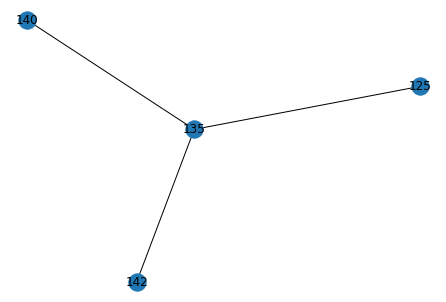

match_branches = []
edges_to_delete (resolve crossover) = [[125, 135], [125, 140], [125, 142], [135, 140], [135, 142], [140, 142]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[125, 135], [125, 140], [125, 142], [135, 140], [135, 142], [140, 142]]
edges_to_create = []
Number of connected components = 12
Comp 0 = {0, 5, 9, 11, 12, 15, 18, 25, 31, 38, 41, 42, 44, 46, 47, 50, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 83, 87, 88, 89, 91, 92, 93, 94, 97, 98, 99, 101, 103, 105, 107, 109, 113, 114, 115, 116, 118, 123, 127, 128, 129, 130, 131, 132, 135, 137, 138, 139, 1

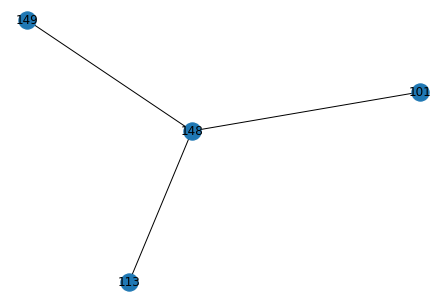

match_branches = [[101, 149], [113, 148]]
edges_to_delete (resolve crossover) = [[101, 113], [101, 148], [113, 149], [148, 149]]
edges_to_create (resolve crossover) = [[101, 149], [113, 148]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [125, 135], [125, 140], [125, 142], [135, 140], [135, 142], [140, 142]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[101, 113], [101, 148], [113, 149], [148, 149]]
edges_to_create = [[101, 149], [113, 148]]
Number of connected components = 13
Comp 0 = {0, 11, 12, 18, 25, 31, 44, 54, 61, 63, 65, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 83, 87, 88, 89, 91, 92, 93, 94, 97, 98, 99, 103, 105, 107, 109, 113, 114, 115, 116, 118, 123, 127, 128, 129, 130, 131,

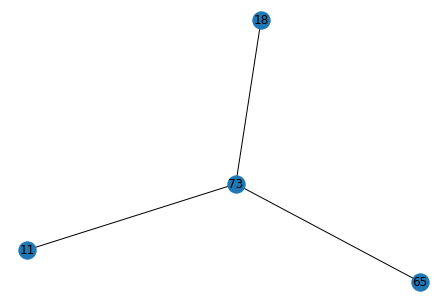

match_branches = [[11, 73]]
edges_to_delete (resolve crossover) = [[11, 18], [11, 65], [18, 65], [18, 73], [65, 73]]
edges_to_create (resolve crossover) = [[11, 73]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 30], [19, 32], [30, 32], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [114, 119], [114, 123], [114, 126], [114, 128], [119, 123], [119, 126], [119, 127], [119, 128], [123, 126], [123, 127], [123, 128], [126, 127], [126, 128], [127, 128], [60, 86], [60, 100], [86, 100], [86, 101], [100, 101], [125, 135], [125, 140], [125, 142], [135, 140], [135, 142], [140, 142], [101, 113], [101, 148], [113, 149], [148, 149]]
Skipping endnode 88 because skeletal distance was 320.4566134615286 and threshold was 2500
skip_nodes = [88]
edges_to_delete (cut_limb_network) = [[11, 18], [11, 65], [18, 65], [18, 73], [65, 73]]
edges_to_create = [[11, 73]]
Number of connected components = 16
Comp 0 = {0, 129, 130, 131, 135, 137, 12, 143, 25, 153, 156, 159, 162, 163, 166, 167, 168, 169, 44, 173, 174

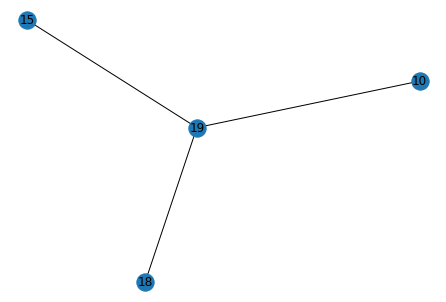

match_branches = []
edges_to_delete (resolve crossover) = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 27 because skeletal distance was 792.356447262338 and threshold was 2500
skip_nodes = [27]
edges_to_delete (cut_limb_network) = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {18}
Comp 1 = {10}
Comp 2 = {0, 6, 15}
Comp 3 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71}
Comp 4 = {30}
curr_limb_copy.deleted_edges = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]], 

  Edge: [10  7]: curr_angle = 12.39
  Edge: [7 6]: curr_angle = 123.22
  Edge: [ 6 16]: curr_angle = 28.64
  Edge: [16 24]: curr_angle = 36.64
  Edge: [24 26]: curr_angle = 11.21
  Edge: [26 29]: curr_angle = 30.79
  Edge: [29 31]: curr_angle = 22.16
  Edge: [31 37]: curr_angle = 38.21
  Edge: [37 34]: curr_angle = 33.53

Total time for doubling_back = 1.1342003345489502
There were 1 edges that passed doubling back threshold of 100
Winning edge [7 6] had a doubling back of 123.21787348157942
***inside resolve crossover!!!!****
coordinate_branches = [5, 6, 7]
5 = red
6 = aqua
7 = purple
Angle between 5 and 6 = 25.28 
Angle between 5 and 7 = 45.97 
Angle between 6 and 7 = 108.8 
Final Matches = [[5, 6]]
matched_branches_revised = [[5, 6]]
Original graph


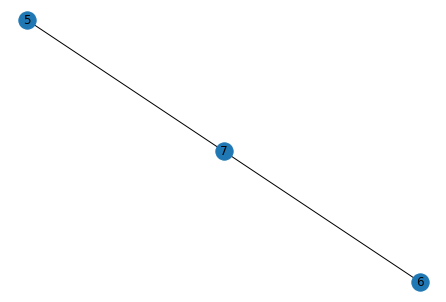

match_branches = [[5, 6]]
edges_to_delete (resolve crossover) = [[5, 7], [6, 7]]
edges_to_create (resolve crossover) = [[5, 6]]
edges_to_delete (cut_limb_network) = [array([5, 7]), array([6, 7])]
edges_to_create = [[5, 6]]
Number of connected components = 2
Comp 0 = {9, 10, 7}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
curr_limb_copy.deleted_edges = [array([5, 7]), array([6, 7])]
curr_limb_copy.created_edges = [[5, 6]]
After get best cut: cut_edges = [array([5, 7]), array([6, 7])], added_edges = [[5, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 9, 10,  7]), array([ 0,  

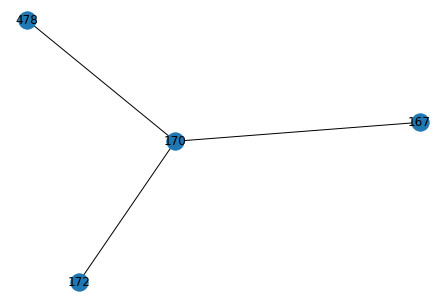

match_branches = [[167, 478]]
edges_to_delete (resolve crossover) = [[167, 170], [167, 172], [170, 172], [170, 478], [172, 478]]
edges_to_create (resolve crossover) = [[167, 478]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 170 because skeletal distance was 847.7799228574162 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 170], [167, 172], [170, 172], [170, 478], [172, 478]]
edges_to_create = [[167, 478]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112

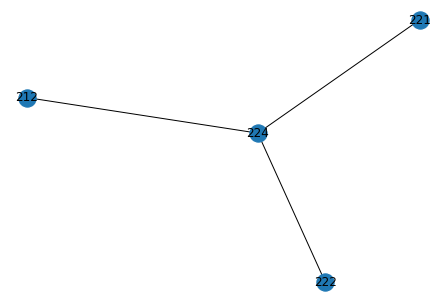

match_branches = [[221, 222], [212, 224]]
edges_to_delete (resolve crossover) = [[212, 221], [212, 222], [221, 224], [222, 224]]
edges_to_create (resolve crossover) = [[221, 222], [212, 224]]
curr_limb.deleted_edges 5 =[[167, 170], [167, 172], [170, 172], [170, 478], [172, 478]]
Skipping endnode 218 because skeletal distance was 204.66458720559726 and threshold was 2500
Skipping endnode 221 because skeletal distance was 1043.7554907480974 and threshold was 2500
skip_nodes = [218, 221]
edges_to_delete (cut_limb_network) = [[212, 221], [212, 222], [221, 224], [222, 224]]
edges_to_create = [[221, 222], [212, 224]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86

  Edge: [219 216]: curr_angle = 26.25
  Edge: [216 220]: curr_angle = 39.39
  Edge: [220 315]: curr_angle = 110.54
  Edge: [315 344]: curr_angle = 37.07
  Edge: [344 371]: curr_angle = 74.04
  Edge: [371 373]: curr_angle = 26.74
  Edge: [373 378]: curr_angle = 33.36
  Edge: [378 380]: curr_angle = 37.49
  Edge: [380 379]: curr_angle = 30.99
  Edge: [379 387]: curr_angle = 11.89
  Edge: [387 390]: curr_angle = 19.09

Total time for doubling_back = 0.8465576171875
There were 1 edges that passed doubling back threshold of 100
Winning edge [220 315] had a doubling back of 110.53529783797443
***inside resolve crossover!!!!****
coordinate_branches = [220, 315, 316]
220 = red
315 = aqua
316 = purple
Angle between 220 and 315 = 112.3 
Angle between 220 and 316 = 24.26 
Angle between 315 and 316 = 78.58 
Final Matches = [[220, 316]]
matched_branches_revised = [[220, 316]]
Original graph


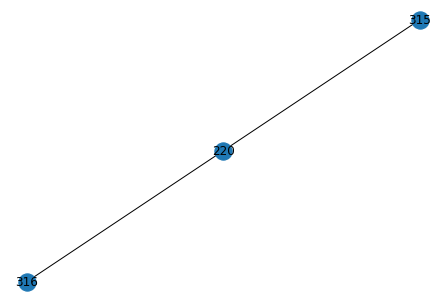

match_branches = [[220, 316]]
edges_to_delete (resolve crossover) = [[220, 315], [315, 316]]
edges_to_create (resolve crossover) = [[220, 316]]
edges_to_delete (cut_limb_network) = [array([220, 315]), array([315, 316])]
edges_to_create = [[220, 316]]
Number of connected components = 5
Comp 0 = {512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 96, 613, 616, 617, 618, 621, 622, 623, 624, 625, 626, 627, 136, 145, 162, 167, 176, 177, 179, 185, 186, 202, 206, 207, 216, 218, 219, 220, 227, 316, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511}
Comp 1 = {0, 1,

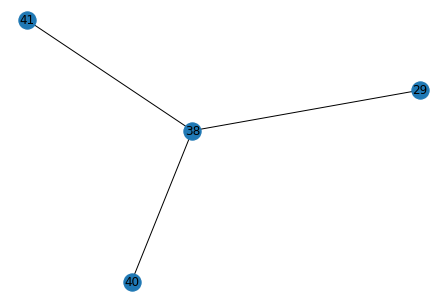

match_branches = [[38, 41], [29, 40]]
edges_to_delete (resolve crossover) = [[29, 38], [29, 41], [38, 40], [40, 41]]
edges_to_create (resolve crossover) = [[38, 41], [29, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[29, 38], [29, 41], [38, 40], [40, 41]]
edges_to_create = [[38, 41], [29, 40]]
Number of connected components = 3
Comp 0 = {1, 5, 11, 19, 21, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 83, 84, 85, 86}
Comp 1 = {0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 28, 37, 38, 41, 47, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 87, 88}
Comp 2 = {62}
curr_limb_copy.deleted_edges = [[29, 38], [29, 41], [38, 40], [40, 41]]
curr_limb_copy.created_edges = [[38, 41], [29, 40]]
After get best cut: cut_edges = [[29, 38], [29, 41], [38, 40], [40, 41]], added_edges = [[38, 41], [29, 40]]
total_soma_paths_

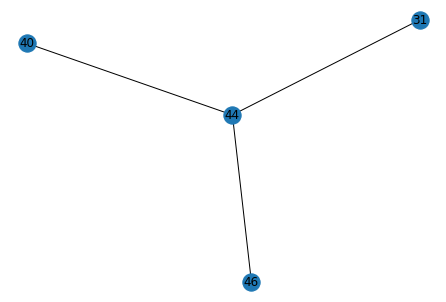

match_branches = [[31, 46], [40, 44]]
edges_to_delete (resolve crossover) = [[31, 40], [31, 44], [40, 46], [44, 46]]
edges_to_create (resolve crossover) = [[31, 46], [40, 44]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 49 because skeletal distance was 272.661152622747 and threshold was 2500
skip_nodes = [49]
edges_to_delete (cut_limb_network) = [[31, 40], [31, 44], [40, 46], [44, 46]]
edges_to_create = [[31, 46], [40, 44]]
Number of connected components = 3
Comp 0 = {3, 29, 31, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 55, 71, 72, 75, 81}
Comp 2 = {45}
curr_limb_copy.deleted_edges = [[31, 40], [31, 44], [40, 46], [44, 46]]
curr_limb_copy.created_edges = [[31, 46], [40, 44]]
After get best cut: cut_edges = [[31, 40], [31

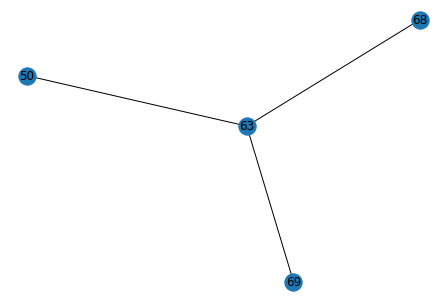

match_branches = [[50, 69], [63, 68]]
edges_to_delete (resolve crossover) = [[50, 63], [50, 68], [63, 69], [68, 69]]
edges_to_create (resolve crossover) = [[50, 69], [63, 68]]
curr_limb.deleted_edges 5 =[[31, 40], [31, 44], [40, 46], [44, 46]]
Skipping endnode 49 because skeletal distance was 272.661152622747 and threshold was 2500
skip_nodes = [49]
edges_to_delete (cut_limb_network) = [[50, 63], [50, 68], [63, 69], [68, 69]]
edges_to_create = [[50, 69], [63, 68]]
Number of connected components = 4
Comp 0 = {64, 65, 69, 70, 73, 74, 76, 79, 80, 50, 51, 82, 85, 54, 56, 59}
Comp 1 = {3, 29, 31, 43, 46, 47, 48, 49, 52, 53, 57, 58, 60, 61, 62, 63, 66, 67, 68, 77, 78, 83, 84}
Comp 2 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 55, 71, 72, 75, 81}
Comp 3 = {45}
curr_limb_copy.deleted_edges = [[31, 40], [31, 44], [40, 46], [44, 46], [50, 63], [50, 68], [63, 69], [68, 69]]
curr_limb_

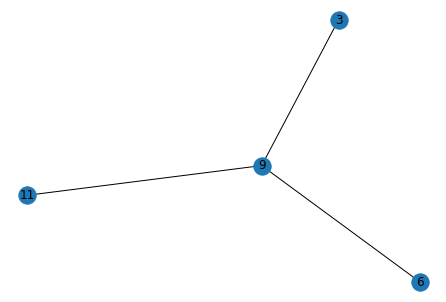

match_branches = [[6, 9], [3, 11]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 9], [6, 11], [9, 11]]
edges_to_create (resolve crossover) = [[6, 9], [3, 11]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 6], [3, 9], [6, 11], [9, 11]]
edges_to_create = [[6, 9], [3, 11]]
Number of connected components = 2
Comp 0 = {2, 3, 5, 7, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Comp 1 = {0, 1, 4, 6, 8, 9, 10, 13}
curr_limb_copy.deleted_edges = [[3, 6], [3, 9], [6, 11], [9, 11]]
curr_limb_copy.created_edges = [[6, 9], [3, 11]]
After get best cut: cut_edges = [[3, 6], [3, 9], [6, 11], [9, 11]], added_edges = [[6, 9], [3, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [arra

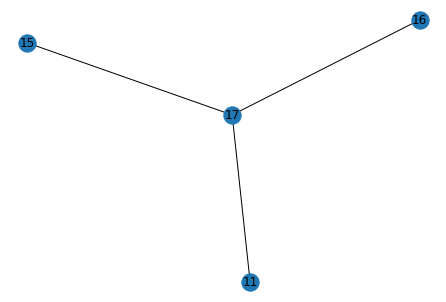

match_branches = [[15, 16], [11, 17]]
edges_to_delete (resolve crossover) = [[11, 15], [11, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[15, 16], [11, 17]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[11, 15], [11, 16], [15, 17], [16, 17]]
edges_to_create = [[15, 16], [11, 17]]
Number of connected components = 2
Comp 0 = {3, 17, 2, 11}
Comp 1 = {0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16}
curr_limb_copy.deleted_edges = [[11, 15], [11, 16], [15, 17], [16, 17]]
curr_limb_copy.created_edges = [[15, 16], [11, 17]]
After get best cut: cut_edges = [[11, 15], [11, 16], [15, 17], [16, 17]], added_edges = [[15, 16], [11, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the s

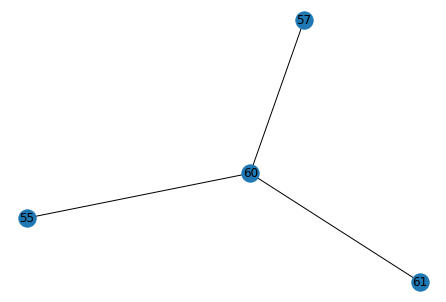

match_branches = [[55, 61], [57, 60]]
edges_to_delete (resolve crossover) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create (resolve crossover) = [[55, 61], [57, 60]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create = [[55, 61], [57, 60]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 1 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61]]
curr_limb_copy.created_edges = [[55, 61], [57, 60]]
After get best cut: cut_edges = [[55, 57], [55, 60], [57, 61], [60, 61]], added_edges = [[55, 61], [57, 60]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 

  Edge: [16 17]: curr_angle = 36.55
  Edge: [17 19]: curr_angle = 33.75
  Edge: [19 20]: curr_angle = 1.89
  Edge: [20 24]: curr_angle = 15.89
  Edge: [24 35]: curr_angle = 40.13
  Edge: [35 74]: curr_angle = 68.21
  Edge: [74 56]: curr_angle = 62.21
  Edge: [56 60]: curr_angle = 38.69
  Edge: [60 57]: curr_angle = 21.39
  Edge: [57 58]: curr_angle = 17.64
  Edge: [58 68]: curr_angle = 19.68
  Edge: [68 67]: curr_angle = 21.29
  Edge: [67 65]: curr_angle = 23.12
  Edge: [65 64]: curr_angle = 19.78

Total time for doubling_back = 1.4383397102355957

Attempting the width jump check (attempting from both sides)
  Edge: [16 17]: jump = -245.66
  Edge: [17 19]: jump = -134.44
  Edge: [19 20]: jump = 0.41
  Edge: [20 24]: jump = 24.76
  Edge: [24 35]: jump = -56.61
  Edge: [35 74]: jump = 129.62
  Edge: [74 56]: jump = 16.09
  Edge: [56 60]: jump = 17.15
  Edge: [60 57]: jump = -44.2
  Edge: [57 58]: jump = 136.41
  Edge: [58 68]: jump = 100.16
  Edge: [68 67]: jump = -7.77
  Edge: [67 65]: 

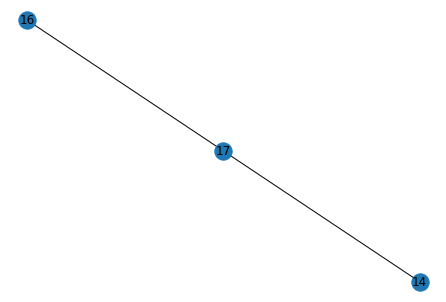

match_branches = []
edges_to_delete (resolve crossover) = [[14, 16], [14, 17], [16, 17]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([14, 16]), array([14, 17]), array([16, 17])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {16}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Comp 2 = {15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 3 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61], array([14, 16]), array([14, 17]), array([16, 17])]
curr_limb_copy.created_edges = [[55, 61], [57, 60]]
After get best cut: cut_edges = [array([14, 16]), array([14, 17]), array([16, 17])], added_edges = []
total_soma_paths_to_cut = [[55, 57], [55, 60], [57, 61], [60, 61]]
-----------counter = 1------------
 Cut iterati

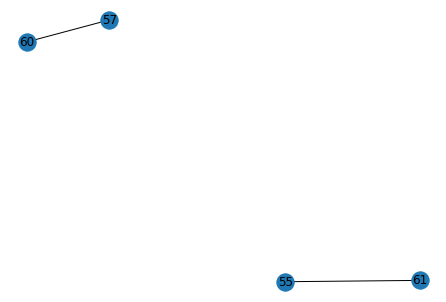

match_branches = [[55, 61], [57, 60]]
edges_to_delete (resolve crossover) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create (resolve crossover) = [[55, 61], [57, 60]]
curr_limb.deleted_edges 5 =[[55, 57], [55, 60], [57, 61], [60, 61], array([14, 16]), array([14, 17]), array([16, 17])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create = [[55, 61], [57, 60]]
Number of connected components = 4
Comp 0 = {16}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
Comp 2 = {15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 3 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61], array([14, 16]), array([14, 17]), array([16, 17]), [55, 57], [55, 60], [57, 61], [60, 61]]
curr_limb_copy.created_edges = [[55, 61]

  Edge: [64 65]: curr_angle = 19.78
  Edge: [65 67]: curr_angle = 23.12
  Edge: [67 68]: curr_angle = 21.29
  Edge: [68 58]: curr_angle = 19.68
  Edge: [58 57]: curr_angle = 17.64
  Edge: [57 60]: curr_angle = 21.39
  Edge: [60 59]: curr_angle = 23.68
  Edge: [59 63]: curr_angle = 8.85
  Edge: [63 66]: curr_angle = 36.59

Total time for doubling_back = 1.170466423034668

Attempting the width jump check (attempting from both sides)
  Edge: [64 65]: jump = -124.18
  Edge: [65 67]: jump = -43.36
  Edge: [67 68]: jump = 7.77
  Edge: [68 58]: jump = -100.16
  Edge: [58 57]: jump = -136.41
  Edge: [57 60]: jump = 44.2
  Edge: [60 59]: jump = -91.5
  Edge: [59 63]: jump = -86.47
  Edge: [63 66]: jump = -15.36
Total time for width = 1.1041860580444336
Path starting at 64 had err_edges: []
  Edge: [66 63]: jump = 15.36
  Edge: [63 59]: jump = 86.47
  Edge: [59 60]: jump = 91.5
  Edge: [60 57]: jump = -44.2
  Edge: [57 58]: jump = 136.41
  Edge: [58 68]: jump = 100.16
  Edge: [68 67]: jump = -7.

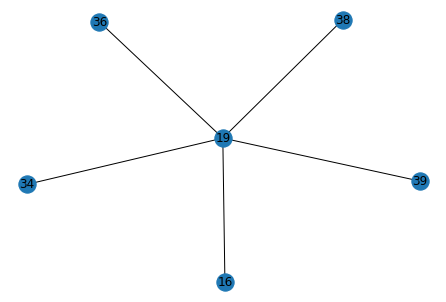

match_branches = [[16, 39], [34, 36], [19, 38]]
edges_to_delete (resolve crossover) = [[16, 19], [16, 34], [16, 36], [16, 38], [19, 34], [19, 36], [19, 39], [34, 38], [34, 39], [36, 38], [36, 39], [38, 39]]
edges_to_create (resolve crossover) = [[16, 39], [34, 36], [19, 38]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 26 because skeletal distance was 172.7234561128138 and threshold was 2500
Skipping endnode 71 because skeletal distance was 177.10322832875286 and threshold was 2500
skip_nodes = [26, 71]
edges_to_delete (cut_limb_network) = [[16, 19], [16, 34], [16, 36], [16, 38], [19, 34], [19, 36], [19, 39], [34, 38], [34, 39], [36, 38], [36, 39], [38, 39]]
edges_to_create = [[16, 39], [34, 36], [19, 38]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68

  Edge: [22 23]: curr_angle = 23.72
  Edge: [23 18]: curr_angle = 27.16
  Edge: [18 19]: curr_angle = 62.58
  Edge: [19 38]: curr_angle = 15.92
  Edge: [38 54]: curr_angle = 39.7
  Edge: [54 56]: curr_angle = 40.99
  Edge: [56 60]: curr_angle = 23.13
  Edge: [60 66]: curr_angle = 9.83
  Edge: [66 68]: curr_angle = 25.78
  Edge: [68 67]: curr_angle = 26.48

Total time for doubling_back = 0.9662249088287354

Attempting the width jump check (attempting from both sides)
  Edge: [22 23]: jump = 21.9
  Edge: [23 18]: jump = -32.1
  Edge: [18 19]: jump = -54.25
  Edge: [19 38]: jump = -192.99
  Edge: [38 54]: jump = 130.3
  Edge: [54 56]: jump = 327.77
Adding error edge [54 56] because width jump was 327.7725551849421
  Edge: [56 60]: jump = 9.05
  Edge: [60 66]: jump = 78.64
  Edge: [66 68]: jump = 83.1
  Edge: [68 67]: jump = 109.12
Total time for width = 0.9468462467193604
Path starting at 26 had err_edges: [[54, 56]]
  Edge: [67 68]: jump = -109.12
  Edge: [68 66]: jump = -83.1
  Edge: [6

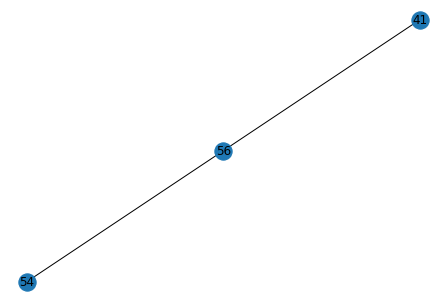

match_branches = []
edges_to_delete (resolve crossover) = [[41, 54], [41, 56], [54, 56]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([41, 54]), array([41, 56]), array([54, 56])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 1, 3, 6, 8, 9, 10, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 37, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 55, 57, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86}
Comp 1 = {16, 39}
Comp 2 = {17, 34, 36, 5}
Comp 3 = {33, 4, 7, 41, 14}
Comp 4 = {2, 11, 12, 20, 21, 30, 48, 49, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 5 = {35}
curr_limb_copy.deleted_edges = [[16, 19], [16, 34], [16, 36], [16, 38], [19, 34], [19, 36], [19, 39], [34, 38], [34, 39], [36, 38], [36, 39], [38, 39], array([41, 54]), array([41, 56]), array([54, 56])]
curr_limb_copy.created_edges = [[16, 39], [34, 36], [19, 38]]
After get best cut: cut_edges = [array([41, 54]), array([41, 5

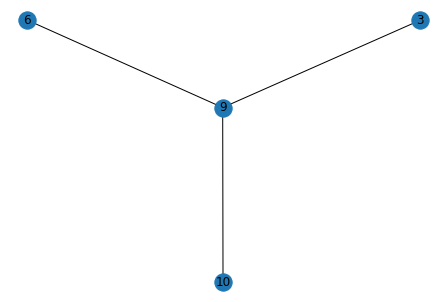

match_branches = [[6, 10], [3, 9]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 10], [6, 9], [9, 10]]
edges_to_create (resolve crossover) = [[6, 10], [3, 9]]
curr_limb.deleted_edges 5 =[[16, 19], [16, 34], [16, 36], [16, 38], [19, 34], [19, 36], [19, 39], [34, 38], [34, 39], [36, 38], [36, 39], [38, 39], array([41, 54]), array([41, 56]), array([54, 56])]
Skipping endnode 26 because skeletal distance was 172.7234561128138 and threshold was 2500
skip_nodes = [26]
edges_to_delete (cut_limb_network) = [[3, 6], [3, 10], [6, 9], [9, 10]]
edges_to_create = [[6, 10], [3, 9]]
Number of connected components = 8
Comp 0 = {6, 10, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 55}
Comp 1 = {0, 1, 3, 9, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 37, 38, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 57}
Comp 2 = {16, 39}
Comp 3 = {17, 34, 36, 5}
Comp 4 = {33, 4, 7, 41, 14}
Comp 5 = {2, 11, 12, 20, 21, 30, 48, 49, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74

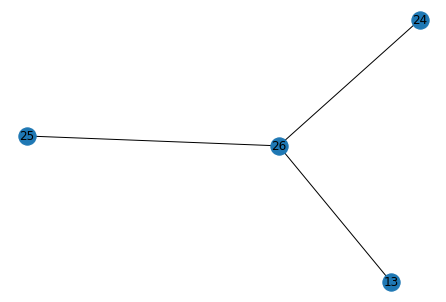

match_branches = [[13, 26], [24, 25]]
edges_to_delete (resolve crossover) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = [[13, 26], [24, 25]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 32 because skeletal distance was 684.1074709625983 and threshold was 2500
skip_nodes = [32]
edges_to_delete (cut_limb_network) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create = [[13, 26], [24, 25]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}
Comp 1 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26]]
curr_limb_copy.created_edges = [[13, 26], [24, 25]]
After get best cut: cut_edges = [[13, 24], [13, 25], [24, 26], [25, 26]], added_edges = [[13, 26], [24, 25]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at

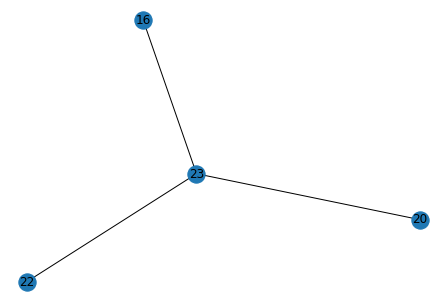

match_branches = [[20, 22], [16, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[20, 22], [16, 23]]
curr_limb.deleted_edges 5 =[[13, 24], [13, 25], [24, 26], [25, 26]]
Skipping endnode 32 because skeletal distance was 684.1074709625983 and threshold was 2500
skip_nodes = [32]
edges_to_delete (cut_limb_network) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create = [[20, 22], [16, 23]]
Number of connected components = 3
Comp 0 = {5, 7, 12, 14, 15, 16, 17, 18, 19, 23, 24, 25, 29, 30, 31, 32, 34, 35, 36, 37, 40, 41, 42, 44, 45}
Comp 1 = {0, 33, 2, 3, 4, 1, 38, 39, 6, 11, 43, 20, 21, 22, 28}
Comp 2 = {8, 9, 10, 13, 26, 27}
curr_limb_copy.deleted_edges = [[13, 24], [13, 25], [24, 26], [25, 26], [16, 20], [16, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[13, 26], [24, 25], [20, 22], [16, 23]]
After get best cut: cut_edges = [[16, 20], [16, 22], [20, 23], [22, 23]], added_edges = [[20, 22], [16, 23]

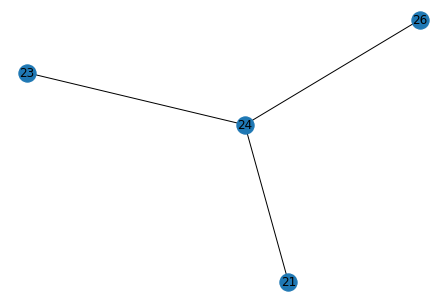

match_branches = [[21, 24]]
edges_to_delete (resolve crossover) = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create (resolve crossover) = [[21, 24]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create = [[21, 24]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 18, 19, 20, 21, 23, 24}
Comp 1 = {33, 6, 10, 11, 12, 15, 17, 22, 26, 27, 28, 29, 30, 31}
Comp 2 = {25}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]]
curr_limb_copy.created_edges = [[21, 24]]
After get best cut: cut_edges = [[21, 23], [21, 26], [23, 24], [23, 26], [24, 26]], added_edges = [[21, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so 

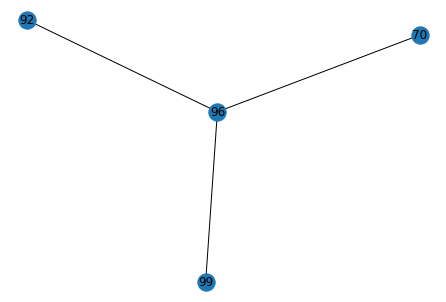

match_branches = [[92, 99]]
edges_to_delete (resolve crossover) = [[70, 92], [70, 96], [70, 99], [92, 96], [96, 99]]
edges_to_create (resolve crossover) = [[92, 99]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 10 because skeletal distance was 1653.4240760493924 and threshold was 2500
Skipping endnode 102 because skeletal distance was 529.6820177891643 and threshold was 2500
skip_nodes = [10, 102]
edges_to_delete (cut_limb_network) = [[70, 92], [70, 96], [70, 99], [92, 96], [96, 99]]
edges_to_create = [[92, 99]]
Number of connected components = 3
Comp 0 = {99, 67, 101, 102, 105, 113, 81, 83, 115, 114, 87, 119, 120, 121, 122, 91, 92, 62}
Comp 1 = {70, 46, 51, 53, 57}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 88, 89, 90,

  Edge: [34 30]: curr_angle = 33.5
  Edge: [30 28]: curr_angle = 6.81
  Edge: [28 26]: curr_angle = 19.65
  Edge: [26 14]: curr_angle = 58.46
  Edge: [14 17]: curr_angle = 36.69
  Edge: [17 15]: curr_angle = 104.04
  Edge: [15 21]: curr_angle = 54.0
  Edge: [21 32]: curr_angle = 23.06
  Edge: [32 36]: curr_angle = 10.86
  Edge: [36 44]: curr_angle = 42.04
  Edge: [44 43]: curr_angle = 21.78
  Edge: [43 46]: curr_angle = 16.03
  Edge: [46 49]: curr_angle = 31.24

Total time for doubling_back = 0.9290344715118408
There were 1 edges that passed doubling back threshold of 100
Winning edge [17 15] had a doubling back of 104.04184471586697
***inside resolve crossover!!!!****
coordinate_branches = [15, 16, 17]
15 = red
16 = aqua
17 = purple
Angle between 15 and 16 = 141.75 
Angle between 15 and 17 = 133.77 
Angle between 16 and 17 = 120.32 
Final Matches = []
matched_branches_revised = []
Original graph


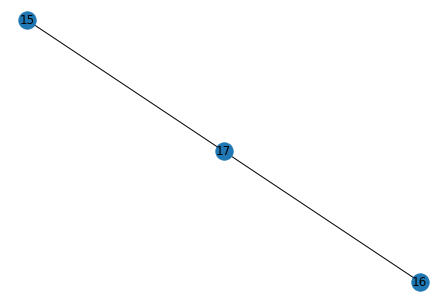

match_branches = []
edges_to_delete (resolve crossover) = [[15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([15, 16]), array([15, 17]), array([16, 17])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 15, 19, 21, 25, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {16}
Comp 2 = {5, 8, 9, 14, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 47, 50}
curr_limb_copy.deleted_edges = [array([15, 16]), array([15, 17]), array([16, 17])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([15, 16]), array([15, 17]), array([16, 17])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No val

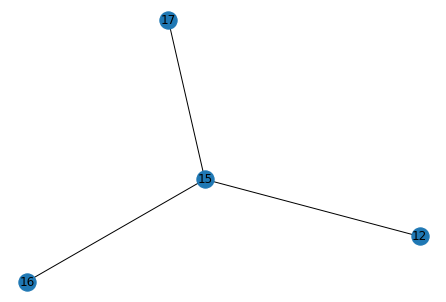

match_branches = [[12, 16]]
edges_to_delete (resolve crossover) = [[12, 15], [12, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[12, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[12, 15], [12, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create = [[12, 16]]
Number of connected components = 3
Comp 0 = {12, 13, 16, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
Comp 1 = {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 14, 15, 18}
Comp 2 = {3, 6, 17, 20, 21}
curr_limb_copy.deleted_edges = [[12, 15], [12, 17], [15, 16], [15, 17], [16, 17]]
curr_limb_copy.created_edges = [[12, 16]]
After get best cut: cut_edges = [[12, 15], [12, 17], [15, 16], [15, 17], [16, 17]], added_edges = [[12, 16]]
tot

  Edge: [57 62]: curr_angle = 43.15
  Edge: [62 59]: curr_angle = 33.79
  Edge: [59 61]: curr_angle = 64.5
  Edge: [61 72]: curr_angle = 38.63
  Edge: [72 77]: curr_angle = 25.89
  Edge: [77 75]: curr_angle = 48.62
  Edge: [75 69]: curr_angle = 28.89

Total time for doubling_back = 0.591151237487793

Attempting the width jump check (attempting from both sides)
  Edge: [57 62]: jump = -1315.67
  Edge: [62 59]: jump = -387.79
  Edge: [59 61]: jump = -152.94
  Edge: [61 72]: jump = -90.26
  Edge: [72 77]: jump = 107.05
  Edge: [77 75]: jump = 49.31
  Edge: [75 69]: jump = 260.56
Adding error edge [75 69] because width jump was 260.55534584064134
Total time for width = 0.8058135509490967
Path starting at 57 had err_edges: [[75, 69]]
  Edge: [69 75]: jump = -260.56
  Edge: [75 77]: jump = -49.31
  Edge: [77 72]: jump = -107.05
  Edge: [72 61]: jump = 90.26
  Edge: [61 59]: jump = 152.94
  Edge: [59 62]: jump = -385.93
  Edge: [62 57]: jump = 904.18
Adding error edge [62 57] because width ju

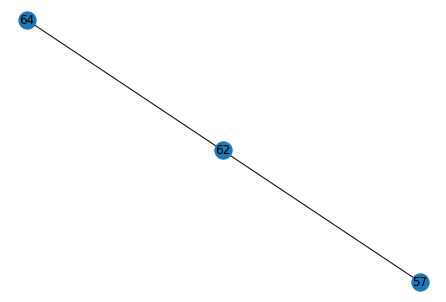

match_branches = []
edges_to_delete (resolve crossover) = [[57, 62], [57, 64], [62, 64]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([57, 62]), array([57, 64]), array([62, 64])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {57}
Comp 1 = {24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 79, 80, 81, 84}
Comp 2 = {12, 13, 16, 19, 22, 23, 25, 26, 64, 70, 71, 78, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
Comp 3 = {0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 14, 15, 18}
Comp 4 = {3, 6, 17, 20, 21}
curr_limb_copy.deleted_edges = [[12, 15], [12, 17], [15, 16], [15, 17], [16, 17], array([57, 62]), array([57, 64]), array([62, 64])]
curr_limb_copy.created_edges = [[12, 16]]
After get best cut: cut_edges = [array([57, 62]), array([57, 64]), array([62, 64])], added_edges = []
total_soma_paths_to_cut = []

  Edge: [51 46]: curr_angle = 28.36
  Edge: [46 39]: curr_angle = 52.58
  Edge: [39 38]: curr_angle = 34.44
  Edge: [38 40]: curr_angle = 37.38
  Edge: [40 62]: curr_angle = 50.19
  Edge: [62 63]: curr_angle = 96.06
  Edge: [63 61]: curr_angle = 102.65
  Edge: [61 19]: curr_angle = 12.21
  Edge: [19 20]: curr_angle = 165.38
  Edge: [20 56]: curr_angle = 52.12
  Edge: [56 65]: curr_angle = 35.9
  Edge: [65 77]: curr_angle = 36.14
  Edge: [77 79]: curr_angle = 31.79
  Edge: [79 86]: curr_angle = 17.62
  Edge: [86 80]: curr_angle = 2.04

Total time for doubling_back = 0.929823637008667
There were 2 edges that passed doubling back threshold of 100
Winning edge [19 20] had a doubling back of 165.38250254972476
***inside resolve crossover!!!!****
coordinate_branches = [16, 19, 20]
16 = red
19 = aqua
20 = purple
Angle between 16 and 19 = 36.6 
Angle between 16 and 20 = 9.15 
Angle between 19 and 20 = 144.55 
Final Matches = [[16, 20]]
matched_branches_revised = [[16, 20]]
Original graph


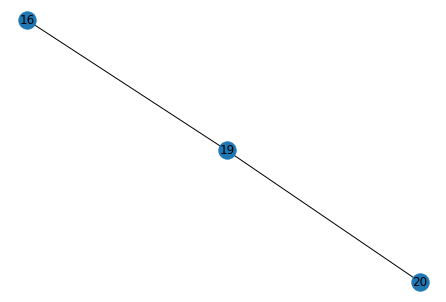

match_branches = [[16, 20]]
edges_to_delete (resolve crossover) = [[16, 19], [19, 20]]
edges_to_create (resolve crossover) = [[16, 20]]
edges_to_delete (cut_limb_network) = [array([16, 19]), array([19, 20])]
edges_to_create = [[16, 20]]
Number of connected components = 2
Comp 0 = {1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 22, 23, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 89, 90, 91, 92, 95, 96, 97, 100, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}
Comp 1 = {0, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 54, 55, 56, 65, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 98, 99, 101, 102, 103, 104, 105, 106}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20])]
curr_limb_copy.created_edges = [[16, 20]]
After get best cut: cut_edges = [array([16, 19]), array([19, 20])], added_edges = [[16, 20]]
total_soma_p

  Edge: [51 46]: curr_angle = 28.36
  Edge: [46 39]: curr_angle = 52.58
  Edge: [39 38]: curr_angle = 34.44
  Edge: [38 40]: curr_angle = 37.38
  Edge: [40 62]: curr_angle = 50.19
  Edge: [62 63]: curr_angle = 96.06
  Edge: [63 68]: curr_angle = 78.71
  Edge: [68 96]: curr_angle = 52.77
  Edge: [ 96 100]: curr_angle = 7.79
  Edge: [100 114]: curr_angle = 17.1
  Edge: [114 115]: curr_angle = 9.88
  Edge: [115 119]: curr_angle = 17.01
  Edge: [119 120]: curr_angle = 2.42

Total time for doubling_back = 0.8648722171783447

Attempting the width jump check (attempting from both sides)
  Edge: [51 46]: jump = 59.46
  Edge: [46 39]: jump = -245.24
  Edge: [39 38]: jump = -138.08
  Edge: [38 40]: jump = -55.04
  Edge: [40 62]: jump = -355.48
  Edge: [62 63]: jump = -37.21
  Edge: [63 68]: jump = 319.82
Adding error edge [63 68] because width jump was 319.8160028719316
  Edge: [68 96]: jump = 71.15
  Edge: [ 96 100]: jump = 5.34
  Edge: [100 114]: jump = 10.12
  Edge: [114 115]: jump = 63.98
  

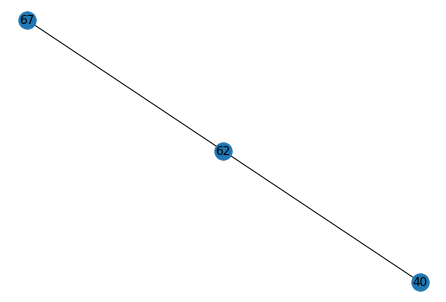

match_branches = [[40, 67]]
edges_to_delete (resolve crossover) = [[40, 62], [62, 67]]
edges_to_create (resolve crossover) = [[40, 67]]
edges_to_delete (cut_limb_network) = [array([40, 62]), array([62, 67])]
edges_to_create = [[40, 67]]
Number of connected components = 3
Comp 0 = {7, 8, 17, 19, 23, 36, 44, 47, 49, 57, 60, 61, 62, 63, 68, 89, 90, 95, 96, 97, 100, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}
Comp 1 = {0, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 54, 55, 56, 65, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 98, 99, 101, 102, 103, 104, 105, 106}
Comp 2 = {1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 18, 22, 25, 27, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 48, 50, 51, 52, 53, 58, 59, 64, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 91, 92}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20]), array([40, 62]), array([62, 67])]
curr_limb_copy.created_edges = [[16, 20], [40, 67]]
After get best cut: cut_edges = [array([40, 62]), a

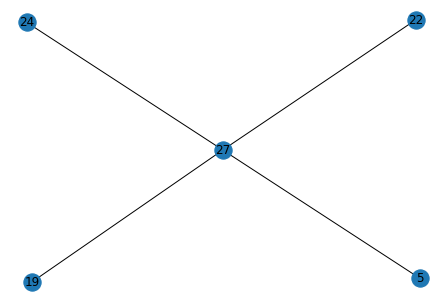

match_branches = [[22, 24], [5, 27]]
edges_to_delete (resolve crossover) = [[5, 19], [5, 22], [5, 24], [19, 22], [19, 24], [19, 27], [22, 27], [24, 27]]
edges_to_create (resolve crossover) = [[22, 24], [5, 27]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 34 because skeletal distance was 406.4225678327359 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[5, 19], [5, 22], [5, 24], [19, 22], [19, 24], [19, 27], [22, 27], [24, 27]]
edges_to_create = [[22, 24], [5, 27]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54}
Comp 1 = {34, 5, 17, 20, 23, 27}
curr_limb_copy.deleted_edges = [[5, 19], [5, 22], [5, 24], [19, 22], [19, 24], [19, 27], [22, 27], [24, 27]]
curr_limb_copy.created_edges = [[22, 24], [5, 27]]
After get best cut: cut_edges = [[5, 19], [5, 22], [5, 24], [19, 22], [1

No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [1 2]: curr_angle = 22.75

Total time for doubling_back = 0.050278425216674805

Attempting the width jump check (attempting from both sides)
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [1 2]: jump = -131.26
Total time for width = 0.026360750198364258
Path starting at 1 had err_edges: []
  Edge: [2 1]: jump = 131.26
Total time for width = 0.023968219757080078
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691136116159140 = 89.41689372062683 -----

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")